In [2]:
# Set up the environment

# Tell R which libraries you need. These should all run here, but if using your own R environment 
# you may have to install any libraries not previously installed.


# Libraries

# install.packages("ggplot2")

library(ggplot2)

#testttttttt

# normally you would import your own data here, but for the sake of time we are using a pre-loaded dataset.

data(iris)   # Load data

head(iris)  # peak at first few rows of data


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [6]:
# Let's get some descriptives from this dataset
# The summary will give us some descriptives for continuous variables and counts for discrete variables

summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

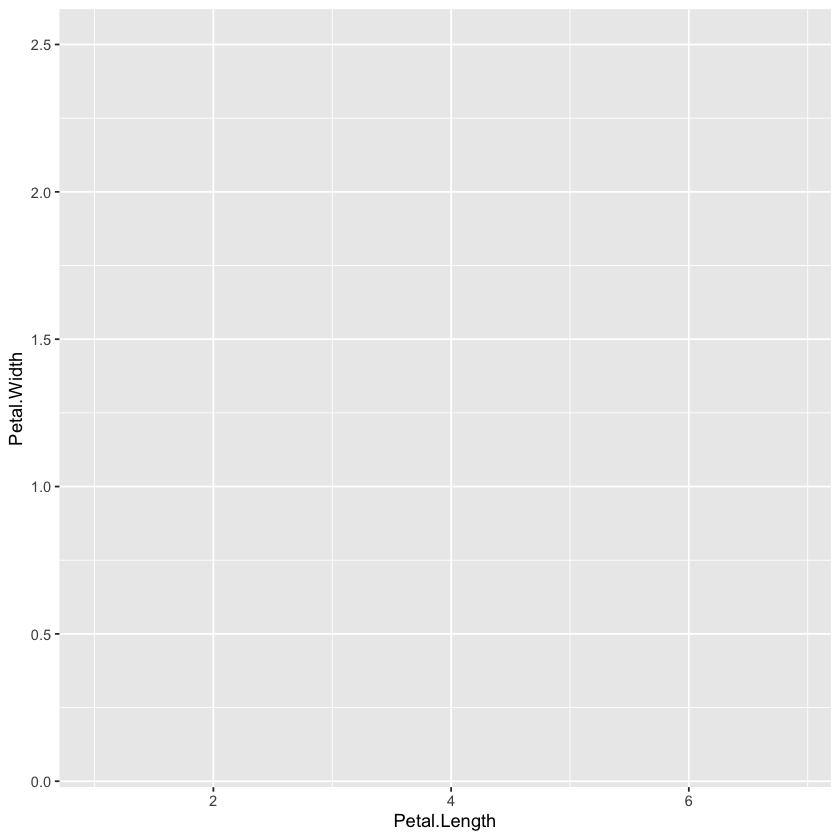

In [14]:
# Setting up ggplot

# First we need to specify which dataset we would like to graph and what variables to use for the X and Y axes
# The code will follow this format: 
# ggplot(DATASET, aes(x = XVARIABLE, y = YVARIABLE))
# This can get more complicated, but for now we'll keep it simple. 

# We'll look at a few continuous variables first

ggplot(iris, aes(x = Petal.Length, y = Petal.Width))

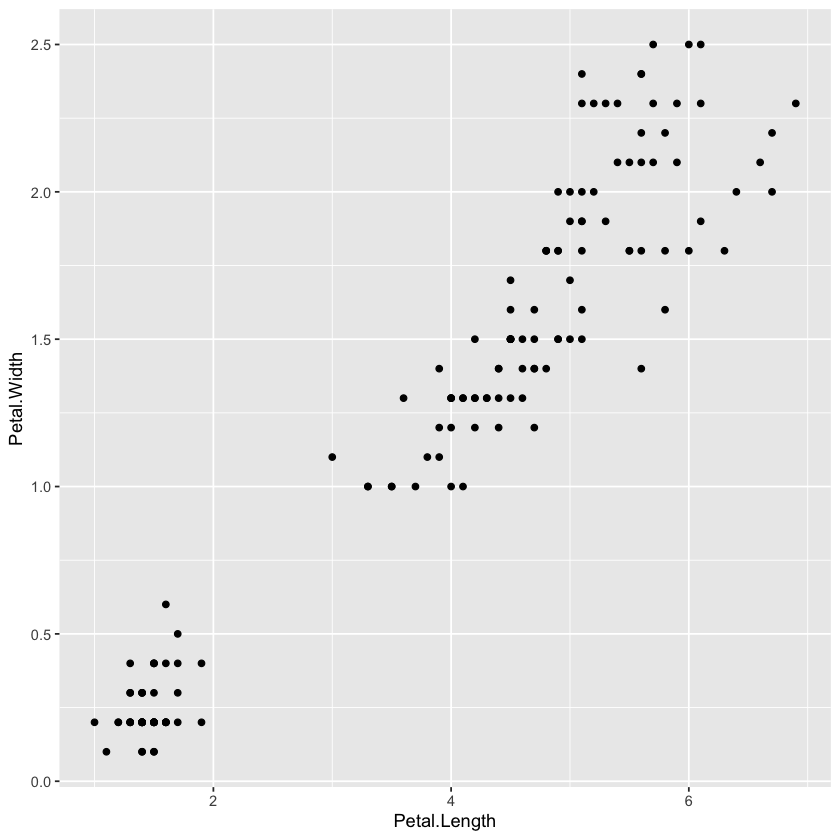

In [7]:
# Okay... but it's empty

# We have to specify how the data should be represented using a geom. 
# We'll start with a scatterplot, showing 2 dimensions of continuous data

ggplot(iris, aes(x = Petal.Length, y = Petal.Width)) +
geom_point()

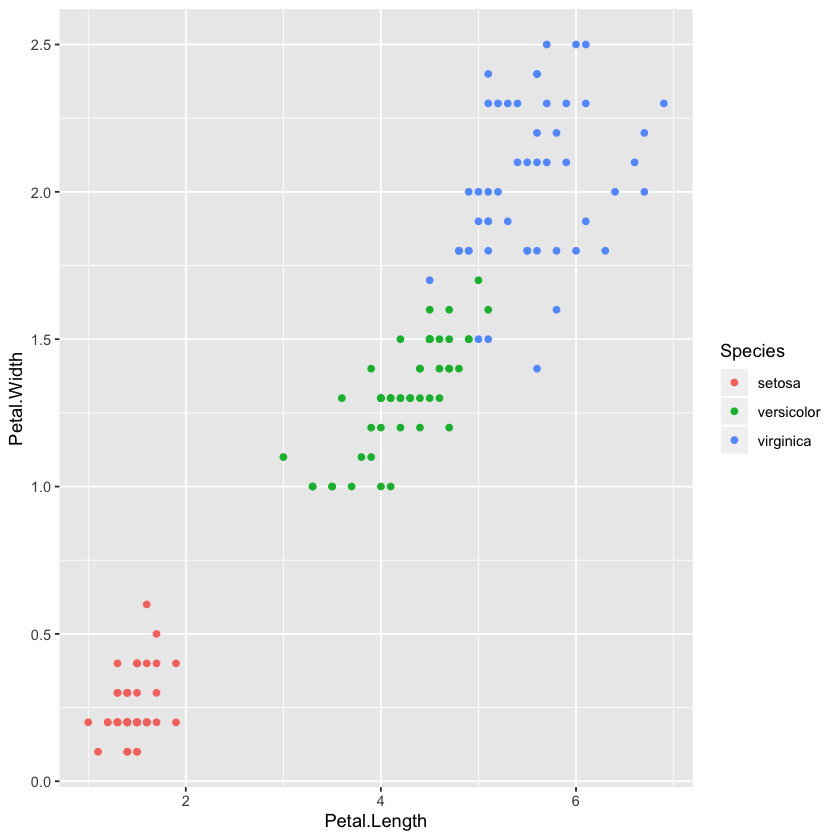

In [8]:
# looks like a strong positive linear relationship between petal length and width -- not surprising. 
# But what about the cluster that is smallest, is there information missing that might make this clearer?

# We can add an aesthetic to the geom to color the geom by Species and see if that clarifies things.

ggplot(iris, aes(x = Petal.Length, y = Petal.Width)) +
geom_point(aes(color = Species)) 

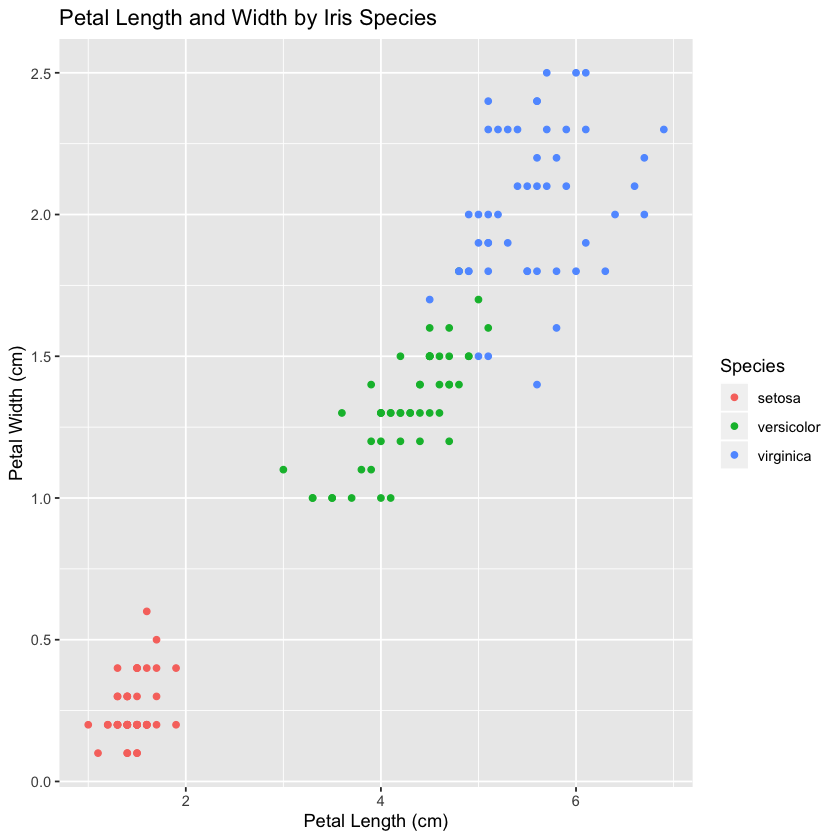

In [9]:
# So with 2 lines of code you have a decent looking graph. You can at least get a sense of the data.
# ...But it could be prettier...

# Let's first rename the axes and add a title. 
ggplot(iris, aes(x = Petal.Length, y = Petal.Width)) +
geom_point(aes(color = Species)) +
labs(title = "Petal Length and Width by Iris Species",
    x = "Petal Length (cm)",
    y = "Petal Width (cm)")


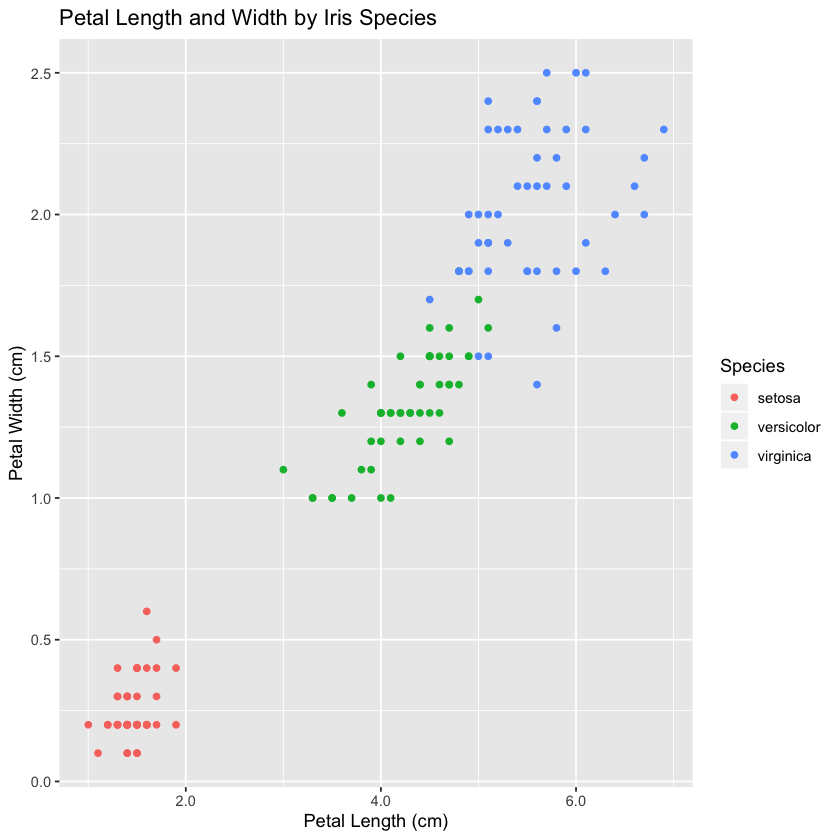

In [10]:
# It's generally poor practice to have different numbers of decimal places on the same graph, let's change that.

# Because X is an aesthetic of the graph, we can control how it is mapped using the scale_<aesthetic>_<type> scheme : 


ggplot(iris, aes(x = Petal.Length, y = Petal.Width)) +
geom_point(aes(color = Species)) +
labs(title = "Petal Length and Width by Iris Species",
    x = "Petal Length (cm)",
    y = "Petal Width (cm)") +
scale_x_continuous(labels=function(x){sprintf("%.1f", x)})  #created a simply anon function, tell it to display x values with 1 decimal place


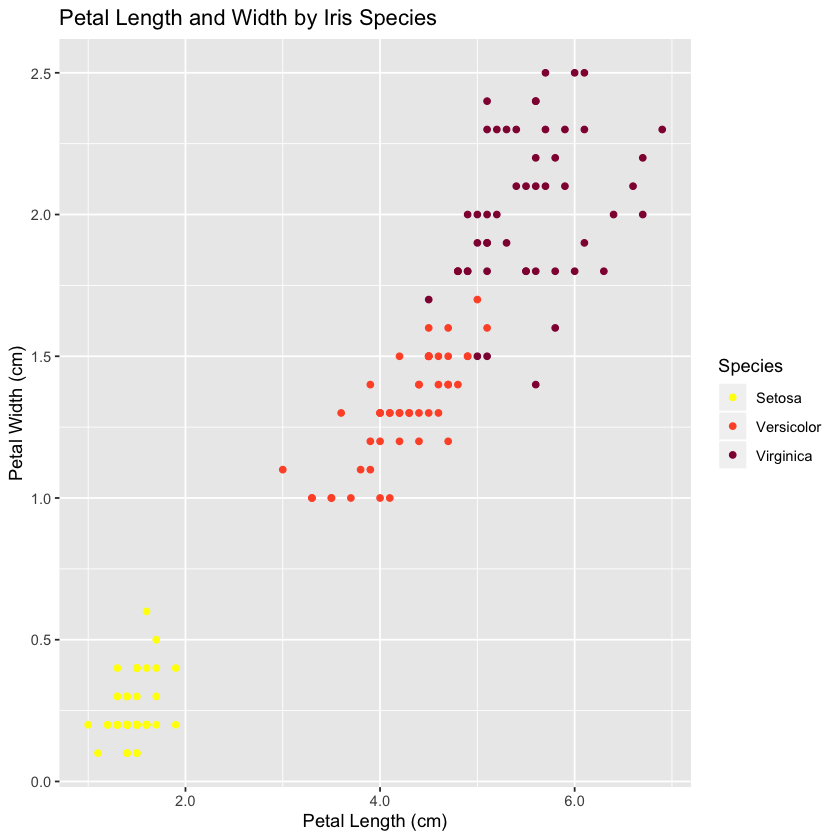

In [38]:
# The default colors used by ggplot are fine, but often we want to change how aesthetics are mapped. How do? 

# Remember, color is an aesthetic here, so we can use the same format we used to change the labels of X above


ggplot(iris, aes(x = Petal.Length, y = Petal.Width)) +
geom_point(aes(color = Species)) +
scale_color_manual(values = c("setosa" = "yellow", 
                              "versicolor" = "#FF5733", 
                              "virginica" = "#900C3F"),
                   labels = c("Setosa", 
                              "Versicolor",
                              "Virginica")) +
labs(title = "Petal Length and Width by Iris Species",
    x = "Petal Length (cm)",
    y = "Petal Width (cm)") +
scale_x_continuous(labels=function(x){sprintf("%.1f", x)})  

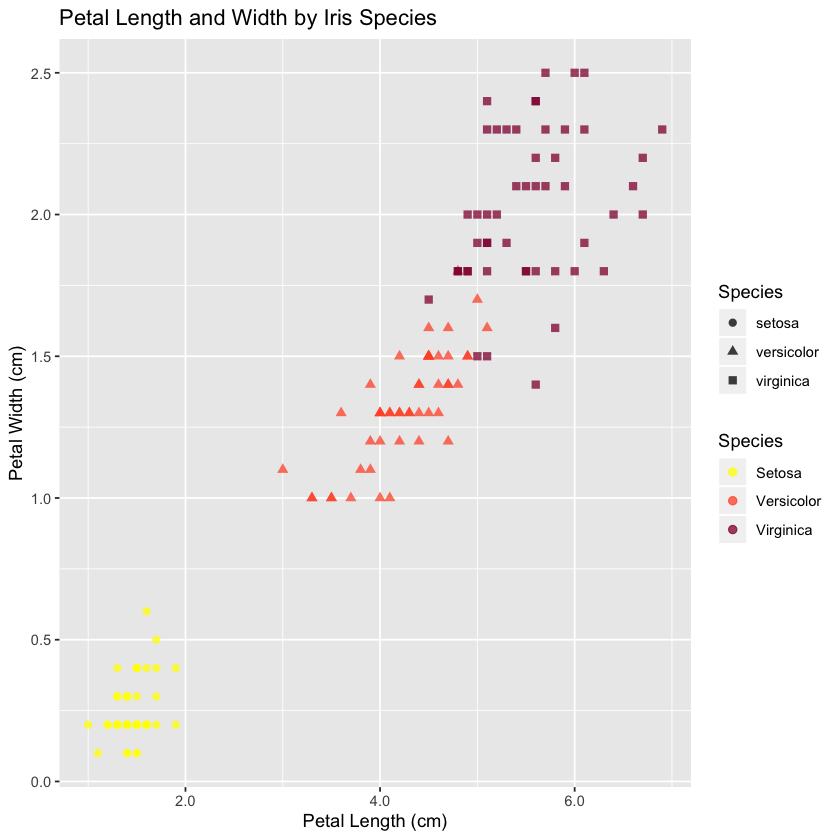

In [39]:
# We could also alter the shape, size, and transparency used for each species 
#(this might be a little overkill for these data specifically)



ggplot(iris, aes(x = Petal.Length, y = Petal.Width)) +
geom_point(aes(color = Species,
               shape = Species),
          size = 2,
          alpha = .75) +
scale_color_manual(values = c("setosa" = "yellow", 
                              "versicolor" = "#FF5733", 
                              "virginica" = "#900C3F"),
                   labels = c("Setosa", 
                              "Versicolor",
                              "Virginica")) +
labs(title = "Petal Length and Width by Iris Species",
    x = "Petal Length (cm)",
    y = "Petal Width (cm)") +
scale_x_continuous(labels=function(x){sprintf("%.1f", x)})  

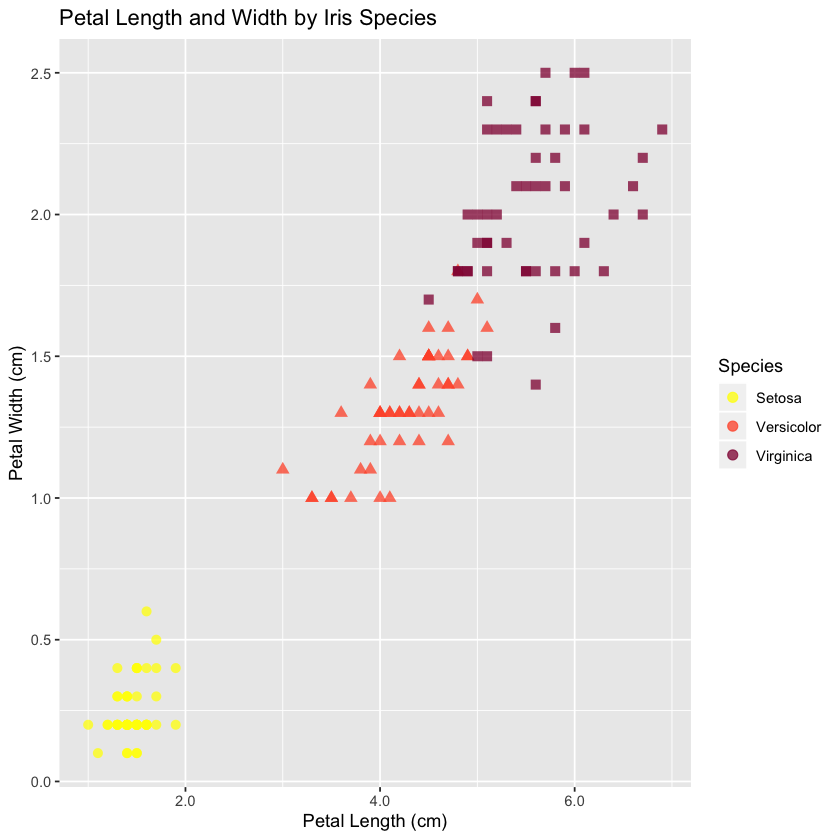

In [20]:
# But oh dear, now we have two legends ... This is typical for ggplot. It creates a legend for everything as an aes


ggplot(iris, aes(x = Petal.Length, y = Petal.Width)) +
geom_point(aes(color = Species,
               shape = Species),
          size = 2.5,
          alpha = 0.75) +
guides(shape = FALSE) +
scale_color_manual(values = c("setosa" = "yellow", 
                              "versicolor" = "#FF5733", 
                              "virginica" = "#900C3F"),
                   labels = c("Setosa", 
                              "Versicolor",
                              "Virginica")) +
labs(title = "Petal Length and Width by Iris Species",
    x = "Petal Length (cm)",
    y = "Petal Width (cm)") +
scale_x_continuous(labels=function(x){sprintf("%.1f", x)}) 

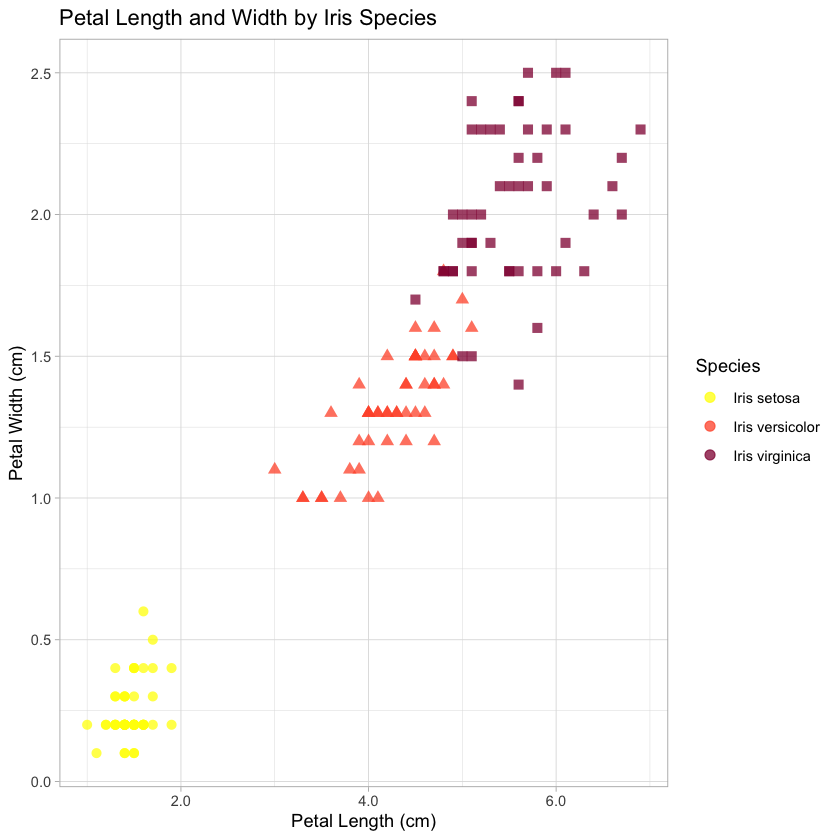

In [22]:
# Our geom is looking pretty sweet now, but there are some features of the legend and graph itself that could be better
# Let's start by changing the preset theme to another built-in theme:

ggplot(iris, aes(x = Petal.Length, y = Petal.Width)) +
geom_point(aes(color = Species,
               shape = Species),
          size = 2.5,
          alpha = 0.75) +
guides(shape = FALSE) +
scale_color_manual(values = c("setosa" = "yellow", 
                              "versicolor" = "#FF5733", 
                              "virginica" = "#900C3F"),
           labels = c("Iris setosa", 
                              "Iris versicolor",
                              "Iris virginica")) +
labs(title = "Petal Length and Width by Iris Species",
    x = "Petal Length (cm)",
    y = "Petal Width (cm)") +
scale_x_continuous(labels=function(x){sprintf("%.1f", x)}) +
theme_light()



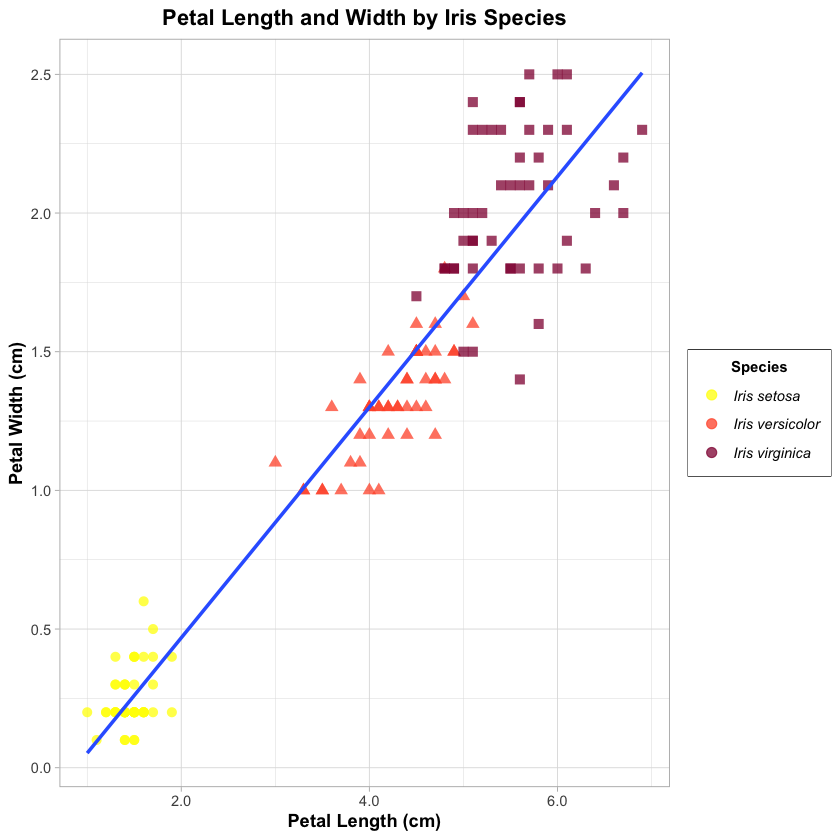

In [41]:
# Now we can go into the theme and change things we and/or our PIs don't like. 
# By creating a custom theme we can change almost any aspect of the plot (see some guides online for details)


#Let's start with centering the title, changing the axis text, and outlining the legend

ggplot(iris, aes(x = Petal.Length, y = Petal.Width)) +
geom_point(aes(color = Species,
               shape = Species),
          size = 2.5,
          alpha = 0.75) +
guides(shape = FALSE) +
scale_color_manual(values = c("setosa" = "yellow", 
                              "versicolor" = "#FF5733", 
                              "virginica" = "#900C3F"),
                   labels = c("Iris setosa", 
                              "Iris versicolor",
                              "Iris virginica")) +
labs(title = "Petal Length and Width by Iris Species",
    x = "Petal Length (cm)",
    y = "Petal Width (cm)") +
scale_x_continuous(labels=function(x){sprintf("%.1f", x)}) +
theme_light() +
theme(
plot.title = element_text(hjust = 0.5, face = "bold"),
legend.title = element_text(face = "bold", size = 9, hjust = 0.5),
axis.title = element_text(face = "bold"),
legend.box.background = element_rect(colour = "black"),
legend.text = element_text(face = "italic")) 

In [40]:
# saving an image

# ggplot has a function for that! If you need a specific dpi, file type, or size, you are covered.

# Word of warning: Always check the output, do not assume it will look the same as R's preview image!

# First save the plot to a variable -- I save this until last because you will not get a preview of the plot if you
# assign to a variable.

iris.plot <- ggplot(iris, aes(x = Petal.Length, y = Petal.Width)) +
geom_point(aes(color = Species,
               shape = Species),
          size = 2.5,
          alpha = 0.75) +
guides(shape = FALSE) +
scale_color_manual(values = c("setosa" = "yellow", 
                              "versicolor" = "#FF5733", 
                              "virginica" = "#900C3F"),
                   labels = c("Iris setosa", 
                              "Iris versicolor",
                              "Iris virginica")) +
labs(title = "Petal Length and Width by Iris Species",
    x = "Petal Length (cm)",
    y = "Petal Width (cm)") +
scale_x_continuous(labels=function(x){sprintf("%.1f", x)}) +
theme_light() +
theme(
plot.title = element_text(hjust = 0.5, face = "bold"),
legend.title = element_text(face = "bold", size = 9, hjust = 0.5),
axis.title = element_text(face = "bold"),
legend.box.background = element_rect(colour = "black"),
legend.text = element_text(face = "italic")) 


# Then call on ggsave
ggsave("iris_plot.png", iris.plot, heigh = 3, width = 3, unit = "in", dpi = 300)

In [18]:
# We can also look discrete data categories and summarize larger datasets

# First we'll load in a dataset that is much larger than the iris and much more un-wieldy 

data(diamonds)
summary(diamonds)
head(diamonds)

     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1610   D: 6775   SI1    :13065   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4906   E: 9797   VS2    :12258   1st Qu.:61.00  
 Median :0.7000   Very Good:12082   F: 9542   SI2    : 9194   Median :61.80  
 Mean   :0.7979   Premium  :13791   G:11292   VS1    : 8171   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :21551   H: 8304   VVS2   : 5066   3rd Qu.:62.50  
 Max.   :5.0100                     I: 5422   VVS1   : 3655   Max.   :79.00  
                                    J: 2808   (Other): 2531                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3933   Mean   : 5.731   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


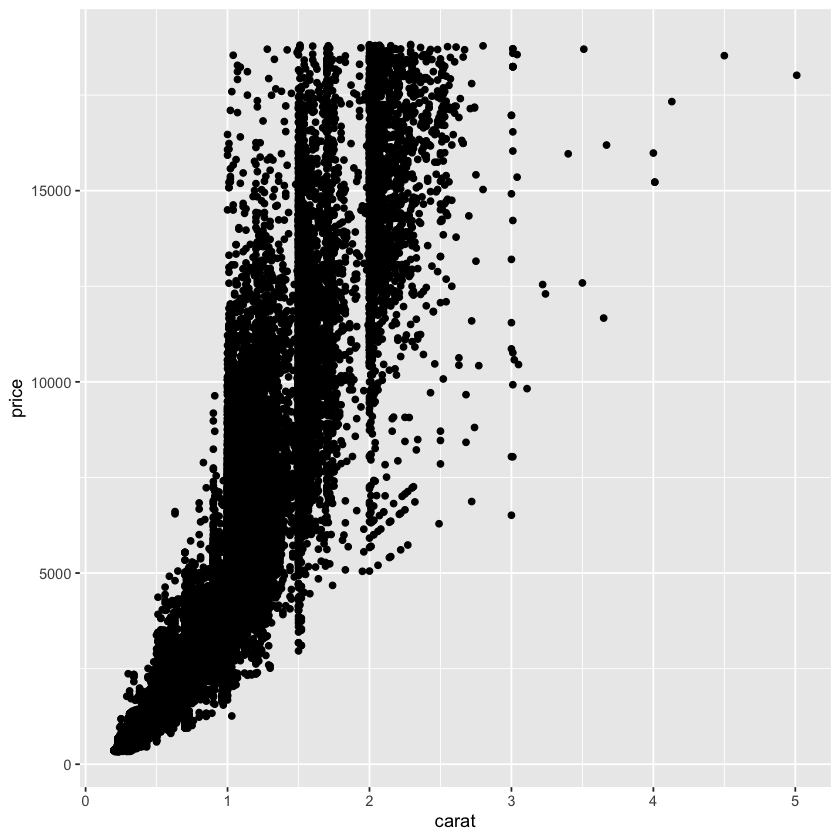

In [45]:
# the data set-up is the same as before just using a different dataset and variables 

# Let's look at how weight (carat) and diamond price relate to one another: 

ggplot(diamonds, aes( x = carat, y = price)) +
geom_point()



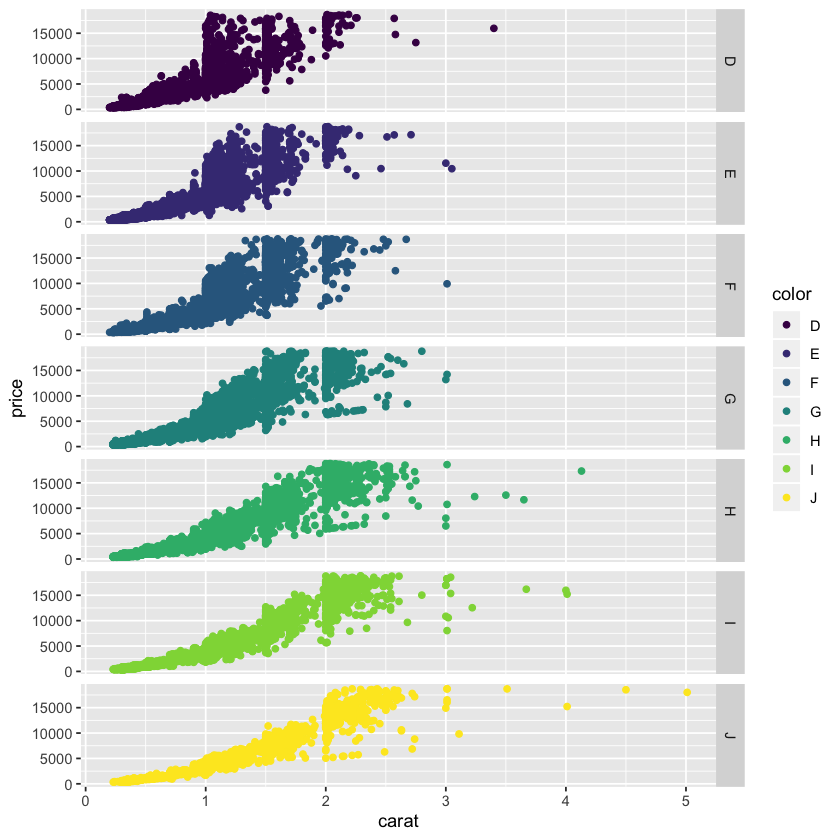

In [60]:
# Yikes, that's a lot of data points (50,000 +). 
# We can add a new dimension to our data to get a clearer picture of what impacts pricing.

# We can either do this on one plot, or create a facet wrap. Because there are so many data points, facet might be better
# You can toggle between facet/single plot by commenting out the facet line, and deleting the "+" and re-running. 


ggplot(diamonds, aes( x = carat, y = price)) +
geom_point(aes(color = color)) +
facet_grid(color ~ .)




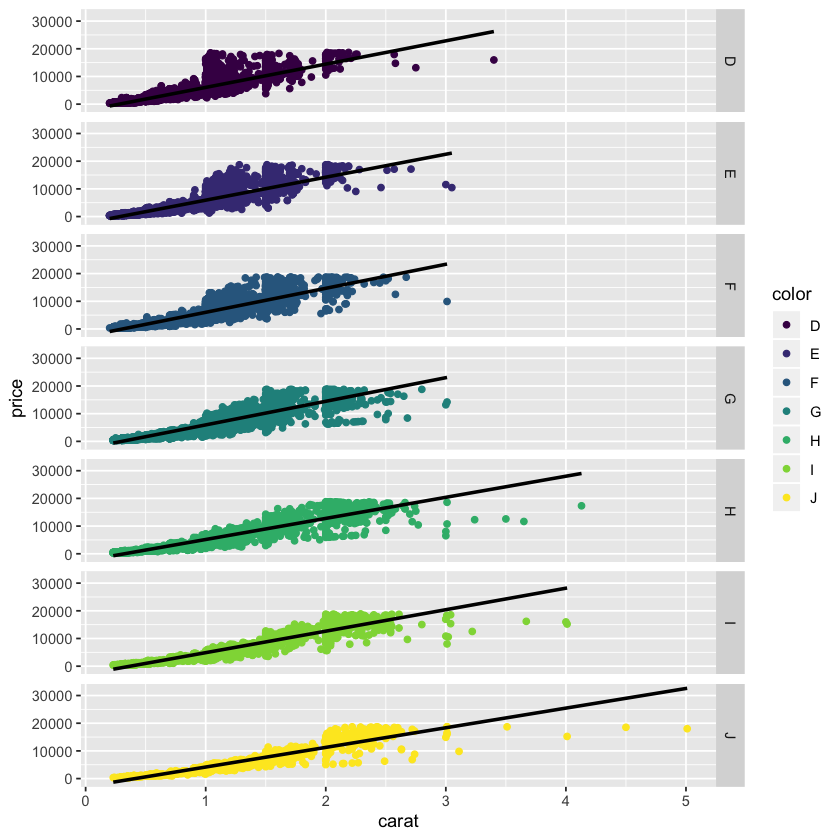

In [59]:

# We can easily add regression lines to each of these facets
# For now we'll fit with a simple linear model, but there a lot of other models available beyond the scope of this

ggplot(diamonds, aes( x = carat, y = price)) +
geom_point(aes(color = color)) +
stat_smooth(method = "lm", se = FALSE, color = "black") +
facet_grid(color ~ .)

Picking joint bandwidth of 458


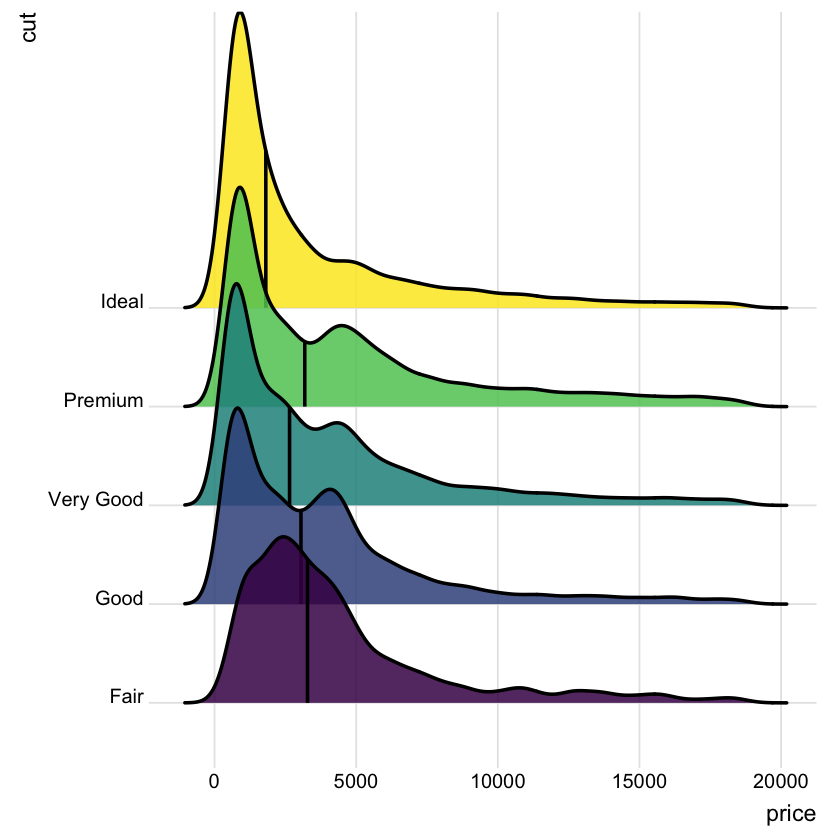

In [65]:
# We can get a feel of the distribution of our data using ggridges -- another handy package
# We'll take a look the distribution of pricing changes by a diamond's cut

#install.packages("ggridges")
library(ggridges)


ggplot(diamonds, aes(x = price, y = cut, fill = cut)) +
  stat_density_ridges(scale = 3, 
                      alpha = 0.85,
                      quantiles = 2,
                      quantile_lines = TRUE,
                      size = 1) +
guides(fill = FALSE) +
  theme_ridges() 

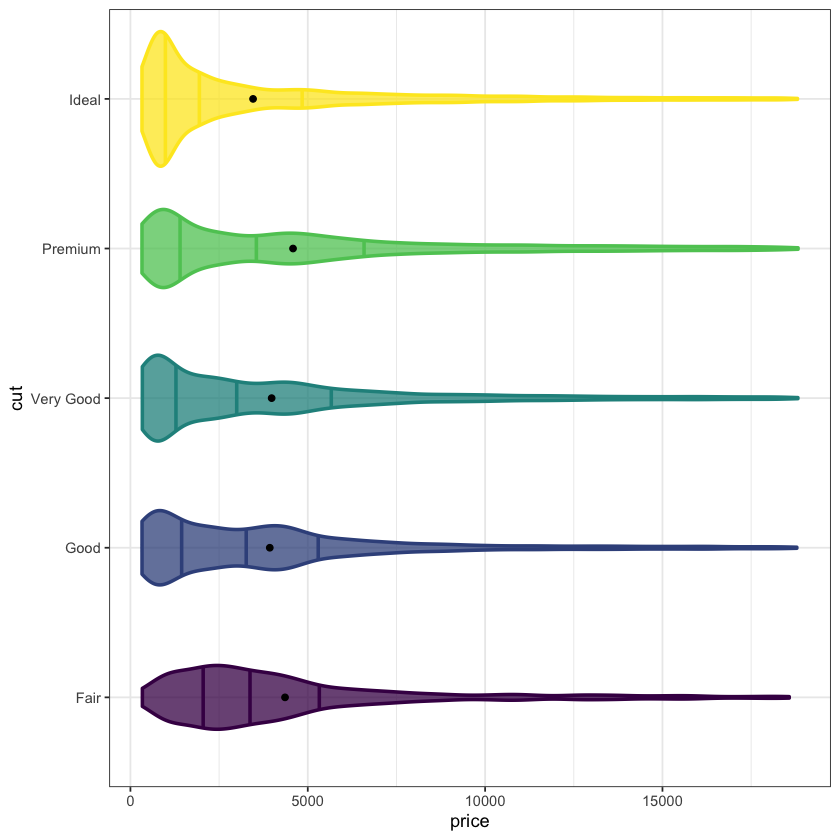

In [14]:
# We can also add some summary info, like quartiles and means quickly
# and also remove legends that aren't needed -- you can comment out the guides line and see what happens!

ggplot(diamonds, aes(x = cut, y = price, color = cut, fill = cut)) +
geom_violin(draw_quantiles = c(0.25, 0.5, 0.75),
           size = 1,
           alpha = 0.75) +
stat_summary(fun.y=mean, geom='point', color = "black") +
guides(fill = FALSE, color = FALSE) +
theme_bw() + 
coord_flip()

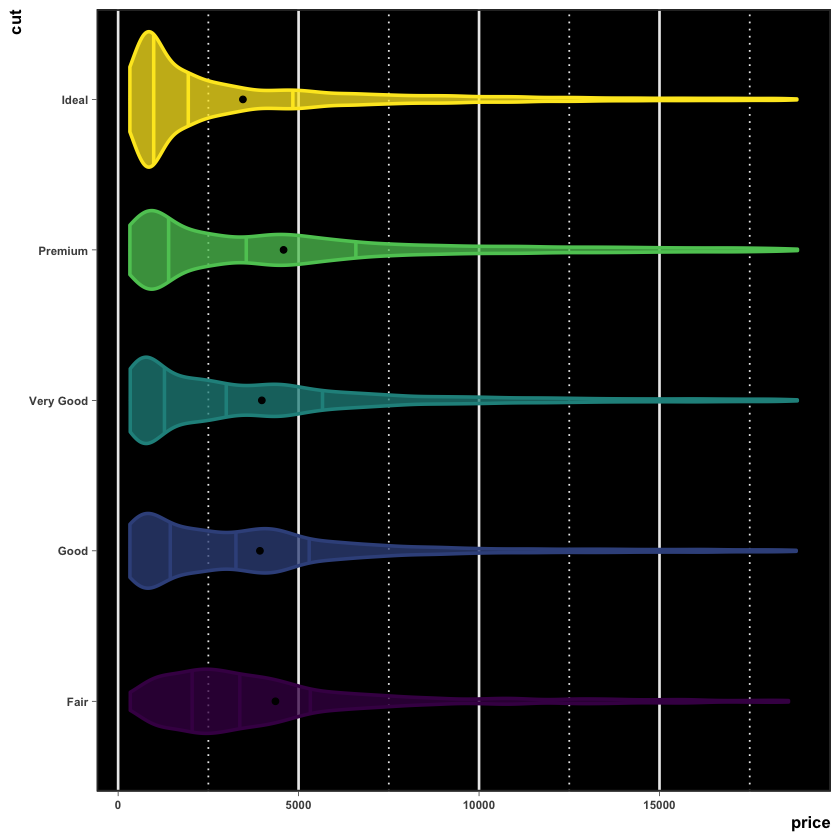

In [35]:

# I'll leave some commented lines here so you're able to play around with theme settings. 
# There are SO MANY settings I couldn't possibly go through each, but Google can help you out there.


ggplot(diamonds, aes(x = cut, y = price, color = cut, fill = cut)) +
geom_violin(draw_quantiles = c(0.25, 0.5, 0.75),
           size = 1,
           alpha = 0.75) +
stat_summary(fun.y=mean, geom='point', color = "black") +
guides(fill = FALSE, color = FALSE) +
coord_flip() +
theme_bw() + 
theme(
    panel.border = element_rect(fill = NA, size = 1),   # change plot border style
    panel.background = element_rect(fill = "black"),    # change plot background color
    panel.grid.major.y = element_blank(),               # uncomment to remove y axis grid lines
    panel.grid.major.x = element_line(size = .75),      # change the size of major X grid
    panel.grid.minor.x = element_line(size = .5, linetype = 3),   # change size & type of minor X grid 
    axis.text = element_text(size = 7, face = "bold"),                 # change all axis text face and size
    axis.title = element_text(size = 10, face = "bold", hjust = 1),    # change axis titles
    axis.ticks = element_line(size = .2)                               # change axis tick marks




)



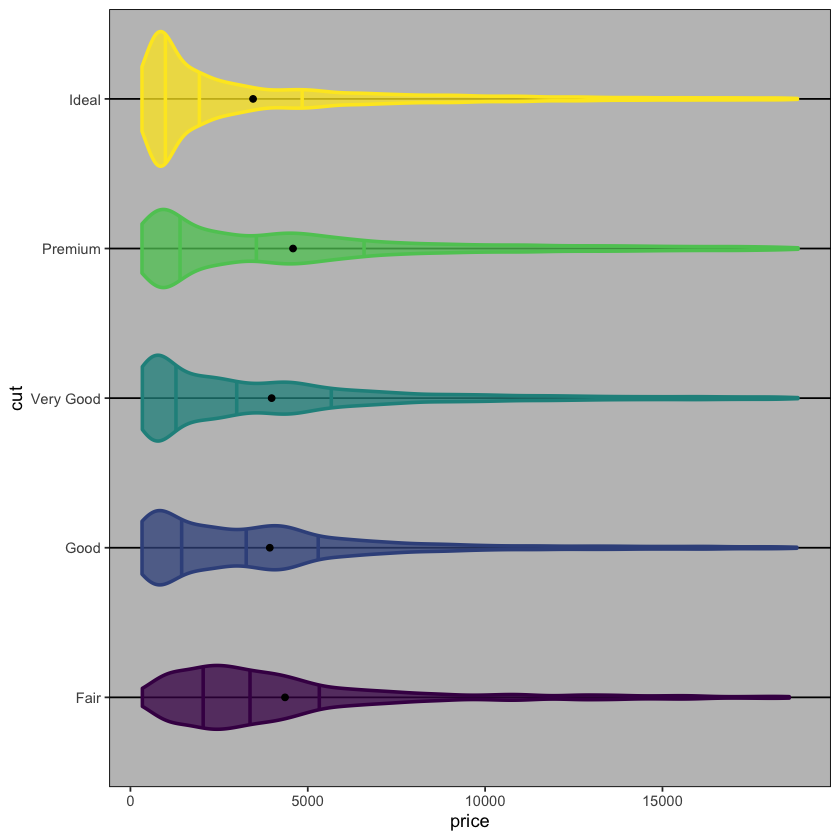

In [73]:
# Bonus fun

# the ggthemes package has some fun and useful pre-built themes

# there is an Economist theme -- create plots that look like they're from the Economist.
# Toggle between some of these if you feel fancy



#install.packages("ggthemes")
library(ggthemes)

ggplot(diamonds, aes(x = cut, y = price, color = cut, fill = cut)) +
geom_violin(draw_quantiles = c(0.25, 0.5, 0.75),
           size = 1,
           alpha = 0.75) +
stat_summary(fun.y=mean, geom='point', color = "black") +
guides(fill = FALSE, color = FALSE) +
coord_flip() +
#theme_economist() 
#theme_tufte()
#theme_few()
#theme_gdocs()
#theme_excel()


In [30]:
#Resources:

#Online course: http://r-statistics.co/Complete-Ggplot2-Tutorial-Part1-With-R-Code.html

#R-graph gallery for inspiration (and code): https://www.r-graph-gallery.com/

#ggplot cheatsheet: https://rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf

#Tidyverse/CRAN info pages: https://ggplot2.tidyverse.org

#Stackoverflow + Google (probably the most helpful resource)
